Notebook for adjusting the animation scripts to work for two dimensional outputs from inference and adjusting difference code to work for both Norkyst and for two dimensional outputs

In [1]:
#animation of results
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean  
import numpy as np 
import sys
import xarray as xr
import cmocean
import cartopy.crs as ccrs
import cartopy

In [2]:
inference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'

dfi = xr.open_dataset(inference_path)
dfi

<xarray.Dataset> Size: 5GB
Dimensions:            (X: 1148, Y: 2747, time: 17)
Coordinates:
  * X                  (X) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * Y                  (Y) float64 22kB 0.0 800.0 ... 2.196e+06 2.197e+06
  * time               (time) datetime64[ns] 136B 2024-04-02 ... 2024-04-04
Data variables: (12/26)
    latitude           (X, Y) float32 13MB ...
    longitude          (X, Y) float32 13MB ...
    h                  (time, X, Y) float32 214MB ...
    salinity_0         (time, X, Y) float32 214MB ...
    sea_mask           (time, X, Y) float32 214MB ...
    temperature_0      (time, X, Y) float32 214MB ...
    ...                 ...
    rain               (time, X, Y) float32 214MB ...
    river_binary_mask  (time, X, Y) float32 214MB ...
    sin_julian_day     (time, X, Y) float32 214MB ...
    sin_latitude       (time, X, Y) float32 214MB ...
    sin_local_time     (time, X, Y) float32 214MB ...
    sin_longitude      (time, X, Y) float32 214MB ...

In [ ]:
#Making sure the general equations work for the inference files:

def results_animation(file_path,variable, dir, frame, start_time, model_name, **kwargs):
    ds = xr.open_dataset(file_path, engine="netcdf4") #add isel when its relevant to select which s-layer you want to look at (per now it is only the surface layer)
    ds_var = ds[f'{variable}']
    print(f'Dataset imported and variable: {variable} is chosen')
    longitude = ds["X"]#.values#.flatten()
    latitude = ds["Y"]#.values#.flatten() 
    print(f'Shape of variable is: {ds_var.shape}')
    print(f'shape of longitude is: {longitude.shape}')
    print(f'shape of latitude is: {latitude.shape}')

    fig,ax = plt.subplots(figsize = (12,8))
    sc = ax.pcolormesh(ds_var[0], cmap = cmocean.cm.speed, shading = 'nearest', **kwargs)
    print('Creating a scatterplot is succsessfull')
    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical", label = variable, extend = 'both')
        
    def update(frame):
        print('Made it to the animation loop')
        sc.set_array(ds_var[frame])
        print('Made it to creating the scatter array (ani)')
        ax.set_title(f'Time step: {frame *3} hrs')
        ax.set_xlabel(f'Latitude [$\circ$]')
        ax.set_ylabel(f'Longitude [$\circ$]')
        return sc 
    print('Made it out of the loop')
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    print('Trying to save it')
    ani.save(f'{dir}/animation_{variable}_{model_name}.gif', writer="imagemagick")



Dataset imported and variable: v_northward_0 is chosen
Shape of variable is: (17, 1148, 2747)
shape of longitude is: (1148,)
shape of latitude is: (2747,)
Creating a scatterplot is succsessfull
Made it out of the loop
Trying to save it
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation loop
Made it to creating the scatter array (ani)
Made it to the animation

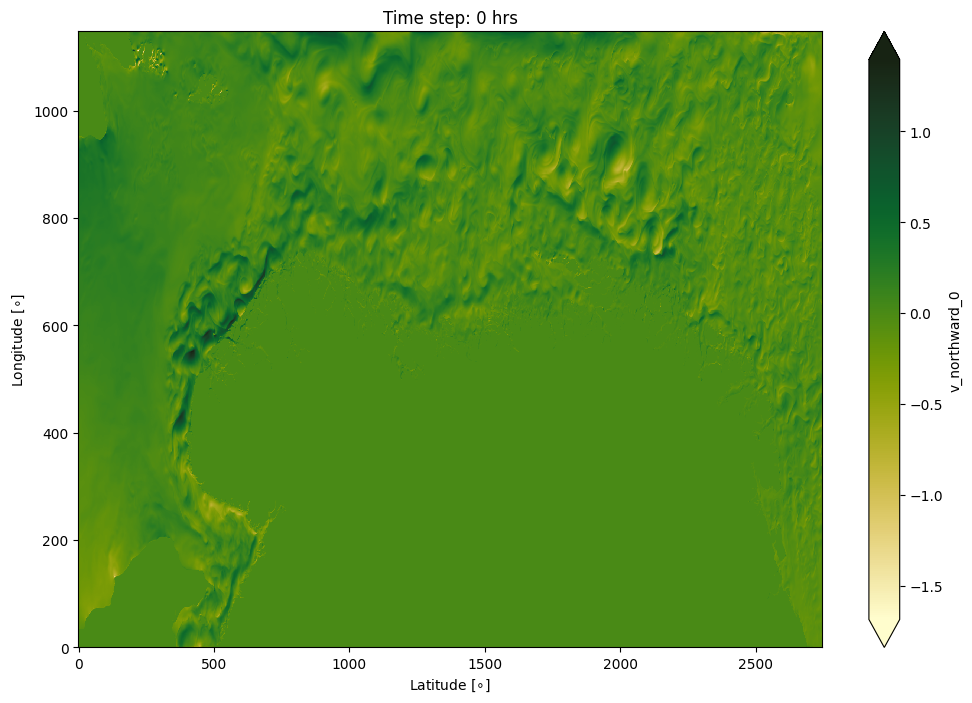

In [ ]:
#Trying to run the code

saving_path = '/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/tests_animations'
inference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'
variable_inf = 'v_northward_0'
frames = 16 
start = 0 
model = 'inference240402'
results_animation(inference_path, variable_inf, saving_path, frames, start, model)


In [ ]:
#Check if the one for absolute val works and maybe rather do it as an if elif inside the first code????
#to save place, but dont do if it takes uncessary time 

def results_absolute_val_animation(file_path, variable1, variable2, dir, model_name, frame=16, start=0, **kwargs):
    ds = xr.open_dataset(file_path, engine="netcdf4")  #add .isel(s_rho = -1) when expanding to 3D model
    ds_var_1 = ds[f'{variable1}']
    ds_var_2 = ds[f'{variable2}']
    print(f'The following variables are selected: {variable1} and {variable2}')
    abs_val = np.sqrt((ds_var_1 **2) + (ds_var_2**2))
    fig,ax = plt.subplots(figsize = (12,8))
    sc = ax.pcolormesh(abs_val[start], cmap = cmocean.cm.speed, **kwargs)
    cbar = fig.colorbar(sc, ax=ax, orientation = "vertical", label = r'$\sqrt{U²+V²}$', extend = 'both')


    def update(frame):
        sc.set_array(abs_val[frame])
        ax.set_title(f'Time step: {frame*3} hrs for model {model_name}')
        ax.set_xlabel(f'X')
        ax.set_ylabel(f'Y')
        return sc 
    
    ani = FuncAnimation(fig, update, frames=range(frame), interval = 400)
    ani.save(f'{dir}/animation_abs_val_{variable1}_+_{variable2}_{model_name}.gif', writer="imagemagick")


In [ ]:
variable_inf2 = 'u_eastward_0'
results_absolute_val_animation(inference_path, variable_inf, variable_inf2, saving_path, 'Inference_20240402', frames, start)

The following variables are selected: v_northward_0 and u_eastward_0


In [3]:
#Importing norkyst as well
path = '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04'
fname = '/norkyst800-20240402.nc'
dfn = xr.open_dataset(path + fname).isel(s_rho = -1)

In [4]:
dfn

<xarray.Dataset> Size: 28GB
Dimensions:           (time: 24, Y: 1148, X: 2747, s_w: 41)
Coordinates:
  * time              (time) datetime64[ns] 192B 2024-04-02 ... 2024-04-02T23...
    s_rho             float64 8B -0.004904
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * s_w               (s_w) float64 328B -1.0 -0.96 -0.9208 ... -0.01 0.0
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 303MB ...
    Vwind_northward   (time, Y, X) float32 303MB ...
    zeta              (time, Y, X) float32 303MB ...
    ubar_eastward     (time, Y, X) float32 303MB ...
    vbar_northward    (time, Y, X) float32 303MB ...
    u_eastward        (time, Y, X) float32 303MB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              float64 8B ...
    Cs_w              (s_w) float64 328B ...
    h                 (Y, X) float32 13MB ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      572391bb-878e-4153-bac1-2bd854d73fe4
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

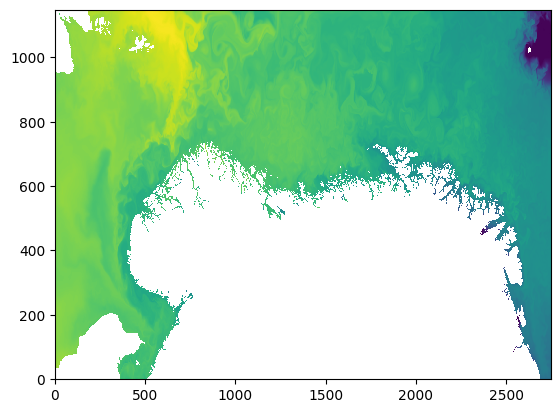

In [5]:
#see how it works to compare temp, salinity, zeta and ocean currents maybe? 
#1. Temperature
temp_i = dfi['temperature_0'].isel(time = 0)
temp_n = dfn['temperature']
plt.pcolormesh(temp_n.values[0,:,:])

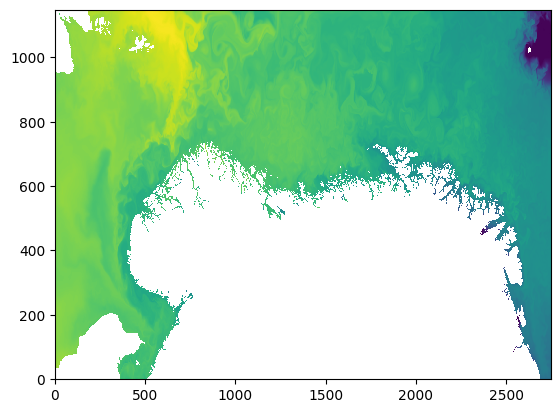

In [6]:
plt.pcolormesh()

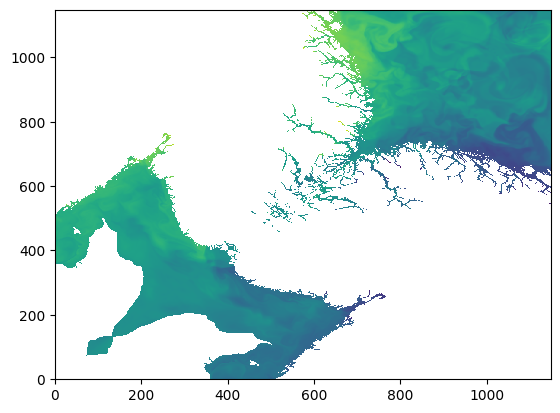

In [8]:
diff = temp_i - temp_n.sel(time = '2024-04-02T00:00:00.000000000')
plt.pcolormesh(diff)

In [ ]:
def animation_compare(file_path_1, file_path_2, file_path_3, variable1, variable2, dir, frame, start_time, title1, title2, **kwargs):
    ds1 = xr.open_dataset(file_path_1, engine = "netcdf4").isel(time=slice(0,16))
    ds2 = xr.open_mfdataset([file_path_2,file_path_3]).isel(s_rho=-1)
    ds1_var = ds1[f'{variable1}']
    ds1_var = np.array(ds1_var)
    #ds1_var = np.pad(ds1_var, ((0,0), (0,77500)), mode = "edge")
    ds2_var = ds2[f'{variable2}'].resample(time='3H').mean(dim='time')
    ds2_var = np.array(ds2_var)
    ds2_var = ds2_var.reshape(ds2_var.shape[-3],-3)
    ds1_var = ds1_var.reindex_like(ds2_var, method = 'nearest')
    longitude = ds1["longitude"] 
    latitude = ds1["latitude"]
    lon = ds2["lon"]
    lat = ds2["lat"]
    fig,ax = plt.subplots(3, figsize = (8,10))

    if variable1 in ["temperature_0","Tair" ] or variable2 in ["temperature_0", "Tair"]:
        cmap = cmocean.cm.thermal
    elif variable1 in ["salinity_0"] or variable2 in ["salinity_0"]:
        cmap = cmocean.cm.haline
    elif variable1 in ["u_eastward_0", "v_northward_0", "Uwind","Vwind"] or variable2 in ["u_eastward_0", "v_northward_0", "Uwind", "Vwind"]:
        cmap = cmocean.cm.speed
    elif variable1 in ["rain", "cloud", "Qair"] or variable2 in ["rain", "cloud", "Qair"]:
        cmap = cmocean.cm.rain
    elif variable1 in ["zeta"] or variable2 in ["zeta"]:
        cmap = cmocean.cm.balance
    elif variable1 in ["Insolation"] or variable2 in ["Insolation"]:
        cmap = cmocean.cm.solar
    elif variable1 in ["Pair"] or variable2 in ["Pair"]:
        cmap = cmocean.cm.dense

    #image1
    print(f'Image 1 - before')
    print(f'lon: {longitude.shape}, lat: {latitude.shape}, ds1_var_vals: {ds1_var.shape}')
    image1 = ax[0].scatter(lon, lat, c=ds1_var[start_time], cmap = cmap, **kwargs)
    cbar1 = plt.colorbar(image1, ax=ax[0], label = f'{variable1}')
    ax[0].set_title(title1)
    ax[0].set_xlabel(f'Longitude [$\circ$]')
    ax[0].set_ylabel(f'Latitude [$\circ$]') 
    print(f'Image 1 - after')

    #image2 
    print(f'ds_var_vals:{ds2_var.shape}, lon: {lon.shape}, lat: {lat.shape}')
    image2 = ax[1].scatter(lon, lat, c=ds2_var[start_time], cmap = cmap, **kwargs)
    cbar2 = plt.colorbar(image2, ax=ax[1], label = f'{variable2}')
    ax[1].set_title(title2)
    ax[1].set_xlabel(f'Longitude [$\circ$]')
    ax[1].set_ylabel(f'Latitude [$\circ]$')
    print(f'Image 2 - after')

    #image3
    diff = (ds2_var - ds1_var)
    print(f'Image 3 - before')
    image3 = ax[2].scatter(lon, lat, c=(diff), cmap = cmap, **kwargs)
    cbar3 = plt.colorbar(image3, ax=ax[2], label = f'{variable2} - {variable1}')
    ax[2].set_title(f'Difference')
    ax[2].set_xlabel(f'Longitude [$\circ$]')
    ax[2].set_ylabel(f'Latitude [$\circ$]')
    print(f'Image 3 - after')

    image = [image1,image2, image3]
    ds = [ds1_var, ds2_var,diff]

    def update(frame):
        for axis, img, ds_data in zip(ax,image,ds):
            img.set_array(ds_data[frame])
            axis.set_title(f'"Time step: {frame *3} hrs')
            axis.set_xlabel(f'Longitude [$\circ$]')
            axis.set_ylabel(f'Latitude [$\circ$]')
        return image
    plt.tight_layout()
    ani = FuncAnimation(fig,update, frames=range(frame), interval = 400, blit = True)
    ani.save(f'{dir}/diff_animation_results_{variable1}_{variable2}.gif', writer="imagemagick")
    

In [20]:
#REWRITE OF the compare function

def animation_compare(file_path_1, file_path_2, file_path_3, variable1, variable2, dir, model_date,  title1 = 'Havbris', title2 = 'Norkyst', frame = 16, start_time = 0, **kwargs):
    """"
    Description: 


    """
    ds_hbris = xr.open_dataset(file_path_1, engine='netcdf4').isel(time = slice(0,16))
    ds_nor = xr.open_mfdataset([file_path_2, file_path_3]).isel(s_rho = -1)
    ds_hbris_var = ds_hbris[f'{variable1}']
    ds_nor_var = ds_nor[f'{variable2}'].resample(time = '3H').mean(dim = 'time')
    print(f'The following variables are selected: {variable1} and {variable2}')

    fig,ax = plt.subplots(3, figsize = (8,14))

    if variable1 in ["temperature_0","Tair" ] or variable2 in ["temperature_0", "Tair"]:
        cmap = cmocean.cm.thermal
    elif variable1 in ["salinity_0"] or variable2 in ["salinity_0"]:
        cmap = cmocean.cm.haline
    elif variable1 in ["u_eastward_0", "v_northward_0", "Uwind","Vwind"] or variable2 in ["u_eastward_0", "v_northward_0", "Uwind", "Vwind"]:
        cmap = cmocean.cm.speed
    elif variable1 in ["rain", "cloud", "Qair"] or variable2 in ["rain", "cloud", "Qair"]:
        cmap = cmocean.cm.rain
    elif variable1 in ["zeta"] or variable2 in ["zeta"]:
        cmap = cmocean.cm.balance
    elif variable1 in ["Insolation"] or variable2 in ["Insolation"]:
        cmap = cmocean.cm.solar
    elif variable1 in ["Pair"] or variable2 in ["Pair"]:
        cmap = cmocean.cm.dense

    #Image1 - Havbris
    image1 = ax[0].pcolormesh(ds_hbris_var[start], cmap = cmap, **kwargs)
    cbar1 = plt.colorbar(image1, ax=ax[0], label = f'{variable1}')
    ax[0].set_title(title1)
    ax[0].set_xlabel(f'Y')
    ax[0].set_ylabel(f'X')

    #Image2 - Norkyst
    image2 = ax[1].pcolormesh(ds_nor_var[start], cmap = cmap, **kwargs)
    cbar2 = plt.colorbar(image2, ax=ax[1], label = f'{variable2}') 
    ax[1].set_title(title2)
    ax[1].set_xlabel(f'Y')
    ax[1].set_ylabel(f'X')

    #Image3 - Diff
    diff = (ds_nor_var - ds_hbris_var)
    image3 = ax[2].pcolormesh(diff[start], cmap = cmap, **kwargs)
    cbar3 = plt.colorbar(image3, ax=ax[2], label = f'{variable2} - {variable1}')
    ax[2].set_title(f'Difference')
    ax[2].set_xlabel(f'Y')
    ax[2].set_ylabel(f'X')

    image = [image1, image2, image3]
    ds = [ds_hbris_var, ds_nor_var, diff]
    
    def update(frame):
        updated = []
        for axis, img, ds_data in zip(ax,image,ds):
            img.set_array(ds_data[frame])
            axis.set_title(f'Time step: {frame *3} hrs')
            axis.set_xlabel(f'Y')
            axis.set_ylabel(f'X')
            updated.append(img)
        return 
    
    plt.tight_layout()
    ani = FuncAnimation(fig,update, frames=range(frame), interval = 400, blit = True)
    ani.save(f'{dir}/diff_animation_results_{variable1}_{variable2}_{model_date}.gif', writer="imagemagick")

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


The following variables are selected: v_northward_0 and v_northward


RuntimeError: NetCDF: HDF error

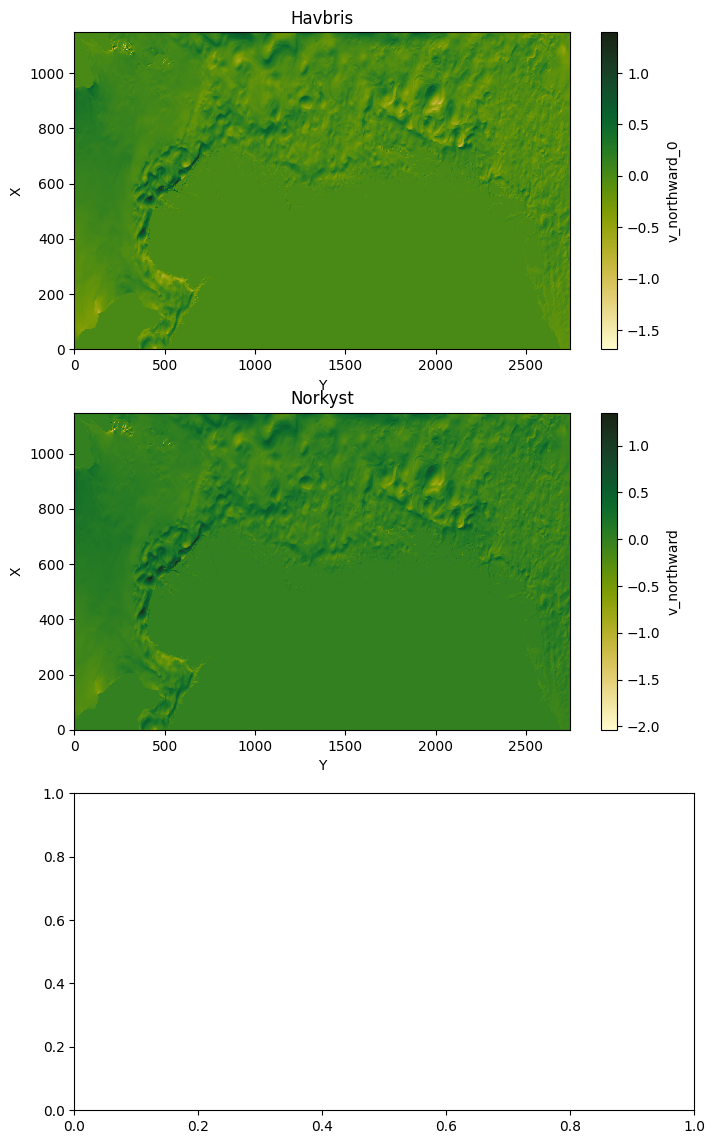

In [21]:
saving_path = '/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/tests_animations'
inference_path = '/lustre/storeB/project/fou/hi/foccus/malene/run-anemoi-ocean/ppi/external_checkpoint_inference/Inference_res/2024-04-02_.ckpt_e010_s020000.nc'
variable_inf = 'v_northward_0'
frames = 16 
start = 0 
model_date = '20240402'

norkystpath = '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04'
n1 = '/norkyst800-20240402.nc'
n2 = '/norkyst800-20240403.nc'

variable_nor = 'v_northward'

animation_compare(inference_path, norkystpath+n1, norkystpath+n2, variable_inf, variable_nor, saving_path, 'Inference_2024_04_02_03')